# Fatal Police Shootings in the U.S. 2015-2017

In [34]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import geopandas as gpd

warnings.filterwarnings('ignore')

# 1. Introduction to the data.

The dataset contains information on incidents of police shootings, encompassing various attributes such as demographics, incident details, and geographical information.

In [187]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1.1 Key Features

1. **Demographics**:
   - *Age:* Range of ages for individuals involved in the incidents.
   - *Gender:* Distribution of male and female individuals.
   - *Race:* Categorical distribution based on race/ethnicity.

2. **Incident Details**:
   - *Date:* Timestamps of when the incidents occurred.
   - *Manner of Death:* Description of how the death occurred (e.g., shot, shot and Tasered).
   - *Armed:* Type of armament involved (e.g., gun, knife, unarmed).
   - *Signs of Mental Illness:* Indication of whether the individual showed signs of mental illness.
   - *Threat Level:* Level of threat perceived during the incident.
   - *Flee:* Description of whether the individual was fleeing the scene.

3. **Geographical Information**:
   - *City:* Locations where the incidents took place.
   - *State:* State-wise distribution of incidents.
   - *Latitude and Longitude:* Geospatial coordinates of the incidents.


## 1.2 Aim of the Project

The primary goal of this project is to comprehensively analyze the shootings dataset, aiming to get insights and patterns from the recorded incidents. 

Understanding the distribution of incidents across various states is a focal point, seeking to identify states with higher occurrence rates or dominance in these incidents. A crucial aspect of this analysis involves data cleaning procedures to ensure the reliability of the subsequent insights.

The primary objectives investigating potential associations between the variable 'race' and other key factors such as 'age', 'flee', and 'armed'. This exploration aims to show whether there's a relationship between race and these variables.

Also, this project will aim to look at majority of the variables in the data.


## 1.3 Basic Statistics About the Data

The dataset consists of 2142 records and 14 columns. Among these columns, 'id' and 'age' are the only numerical features. It's important to note the presence of missing values in some columns, indicating potential data gaps that require attention in the subsequent analysis.

The 'id' column likely represents a unique identifier for each incident, while 'age' denotes the age of the individuals involved. Exploring the distribution of ages might offer insights into the demographics of these incidents.

Other columns in the dataset might contain categorical or textual information, such as 'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', and 'body_camera'. These columns are likely to provide context and descriptive details about each incident.

In [165]:
# Information about the DataFrame (data types, non-null counts, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

# 2. Data cleaning

This section will provide insights about the data:
    - Are there any missing values?
    - How to deal with missing values?
    - Are there any duplicates?
    - Are there any other notable insights?


From the previous section we saw what data types columns in our data have. We know that there is 'date' column, but there is no date data type. Let's create one:

In [166]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

We can see that 'date' column now is in datetime64 data type.

In [145]:
print(data['date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2142 entries, 0 to 2141
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2142 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.9 KB
None


We can see that our data begins from early 2015 and ends in the beginning of 2017.

In [146]:
print(data.date.min())
print(data.date.max())

2015-01-02 00:00:00
2017-02-28 00:00:00


## 2.1 Checking for duplicates

To search for duplicated values firstly we need to remove first column from the data as he is unique for each row.

In [167]:
# Remove the first column (assuming it's the 'id' column)
data = data.iloc[:, 1:]

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Output the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
                     name       date manner_of_death armed   age gender race  \
2053  Jamake Cason Thomas 2017-02-03            shot   gun  22.0      M    B   

         city state  signs_of_mental_illness threat_level flee  body_camera  
2053  Rowland    NC                    False       attack  Car        False  


We can see that there are some duplicates, so let's remove them.

In [168]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Check the shape of the dataframe before and after removing duplicates
print("Shape before removing duplicates:", data.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

Shape before removing duplicates: (2142, 13)
Shape after removing duplicates: (2141, 13)


We have removed one row from our data.

## 2.2 Checking for missing values

This section will provide an overview about missing values in the data.

In [169]:
# Check for missing values
missing_values = data.isnull().sum()

# Filter and display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
name       19
armed       6
age        43
gender      1
race      103
flee       36
dtype: int64


We can see that there are quite a lot of missing values in six columns - 'name', 'armed', 'age', 'gender', 'race' and 'flee'.

In the following sections we are going to analyse 'race', 'armed', 'age' and 'flee' columns, therefore, let's remove missing values for these columns.

In [170]:
data_no_nulls = data_no_duplicates.dropna(subset=['race', 'armed', 'age', 'flee'])

## 2.3 Outliers

After removing missing values and duplicates we can look if there are any outliers. From the previous description we can see that there is only one numerical column 'age', which can have outliers.

In [151]:
data_no_nulls['age'].describe()

count    1985.000000
mean       36.117884
std        12.648880
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        83.000000
Name: age, dtype: float64

We can see that the youngest person who was shot were 6 years old child and the oldest is 83 years old senior. So the age range of the people who have died is not unusual. However, let's look at the boxplot.

Also, we can see that the mean of victims is 36 years.

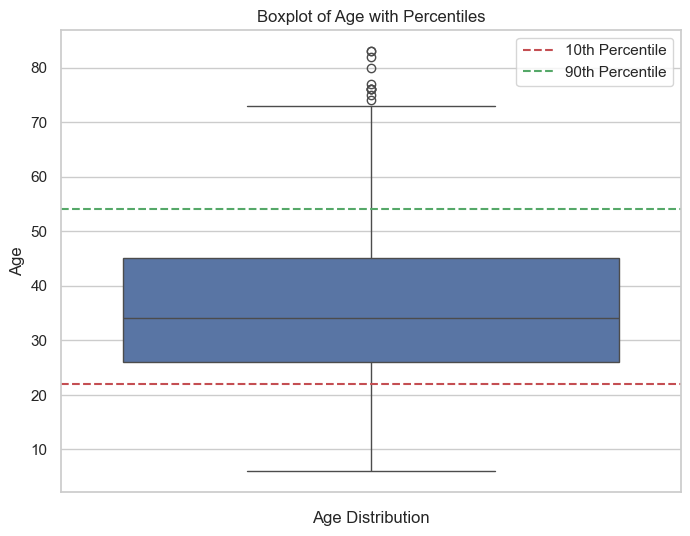

In [152]:
# Calculate the 10th and 90th percentiles for 'age'
percentiles = data_no_nulls['age'].quantile([0.1, 0.9])

# Create a horizontal boxplot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=data_no_nulls, orient='h')
plt.axhline(y=percentiles[0.1], color='r', linestyle='--', label='10th Percentile')
plt.axhline(y=percentiles[0.9], color='g', linestyle='--', label='90th Percentile')
plt.title('Boxplot of Age with Percentiles')
plt.xlabel('Age Distribution')
plt.ylabel('Age')
plt.legend()
plt.show()

We can see that there are quite few values outside of percentiles. However, as we mentioned previously range of the age is not unusual. Values outside of percentiles can be very valuable for our analysis, therefore, all the data will be kept for future.

# 3. Exploratory data analysis (EDA)

In this section we are going to dive deeper to the different columns in our data.

We will use data after removing duplicates and missing values.

For further analysis we will not use 'id' and 'name' columns.

In [153]:
new_data = data_no_nulls.iloc[:, 1:]  # Remove the first two columns
new_data.head(5)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 3.1 Descriptive statistics - manner of death

From the barplot below we can see that manner_of_death column consists of two different categories - 'shot' and 'shot and tasered'. This is very interesting that majority of deaths was due to shooting. Only small part of the victims were also tasered. This might suggest that in US police tend to use brutal force rather trying to capture suspect with less lethal weapon. 

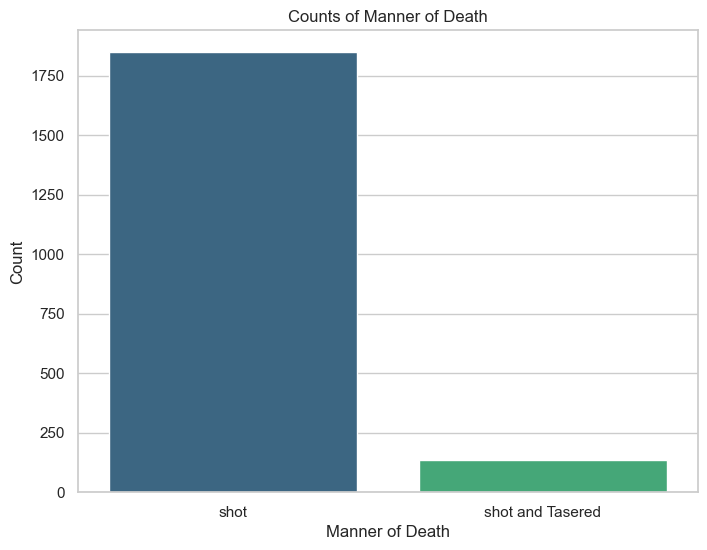

In [117]:
# Count of each manner of death
manner_counts = new_data['manner_of_death'].value_counts()

# Plotting the counts of manner of death
plt.figure(figsize=(8, 6))
sns.barplot(x=manner_counts.index, y=manner_counts.values, palette='viridis')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Counts of Manner of Death')
plt.show()

## 3.2 Descriptive statistics - armed

We can see that 'armed' column have 61 different category.

In [118]:
num_unique_armed = new_data['armed'].nunique()
print(f"The 'armed' column has {num_unique_armed} unique categories.")

The 'armed' column has 61 unique categories.


In [119]:
unique_armed_categories = new_data['armed'].unique()
print("Unique categories in the 'armed' column:")
for category in unique_armed_categories:
    print(category)

Unique categories in the 'armed' column:
gun
unarmed
toy weapon
nail gun
knife
vehicle
shovel
hammer
hatchet
undetermined
sword
machete
box cutter
metal object
screwdriver
lawn mower blade
flagpole
guns and explosives
cordless drill
metal pole
Taser
metal pipe
metal hand tool
blunt object
metal stick
sharp object
meat cleaver
carjack
chain
contractor's level
unknown weapon
stapler
crossbow
bean-bag gun
baseball bat and fireplace poker
straight edge razor
gun and knife
ax
brick
baseball bat
hand torch
chain saw
garden tool
scissors
pole
pick-axe
flashlight
spear
pitchfork
hatchet and gun
rock
piece of wood
bayonet
glass shard
motorcycle
metal rake
baton
crowbar
oar
machete and gun
beer bottle


Let's create new column called 'armed_category'. which will consist of two outcomes - armed and unarmed.

We can see that majority of the victims were armed. So this might suggest why police was using lethal force on the suspects.

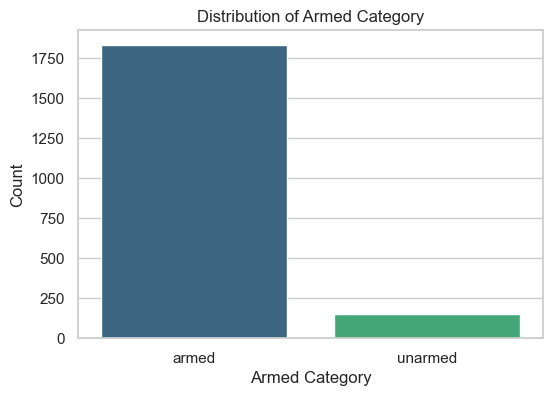

In [120]:
# Create a new column 'armed_category' based on conditions
new_data['armed_category'] = new_data['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

plt.figure(figsize=(6, 4))
sns.countplot(x='armed_category', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Distribution of Armed Category')
plt.show()

When plotting 'manner_of_death' and 'armed_category' columns I would expect to see that majority of unarmed victims will be also tasered. However, we can't see this pattern from the graph, so we can't make such a conclusion.

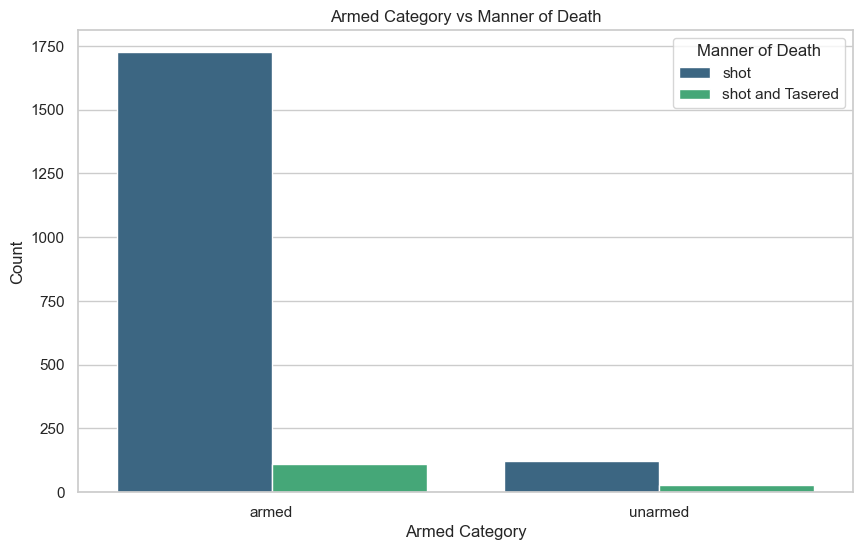

In [121]:
# Plotting armed_category vs manner_of_death
plt.figure(figsize=(10, 6))
sns.countplot(x='armed_category', hue='manner_of_death', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Armed Category vs Manner of Death')
plt.legend(title='Manner of Death')
plt.show()

## 3.3 Descriptive statistics - age

Previously we have slightly looked at the 'age' column already. So, the below graph does not say anything else - we can see that majority of the victims are young or middle aged people. Also, there are some very young and old victims.

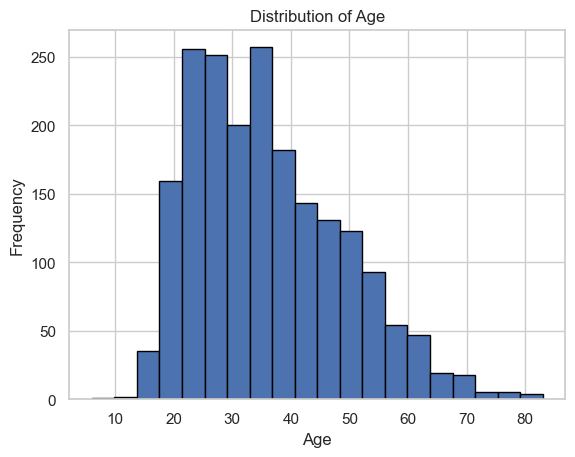

In [122]:
plt.hist(new_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## 3.4 Descriptive statistics - gender

Before looking at the 'gender' column we could expect that majority of the victims will be men.

In [123]:
# Calculate percentage of each gender
gender_percentage = new_data['gender'].value_counts(normalize=True) * 100

# Display the percentage of each gender
print("Percentage of each gender:")
print(gender_percentage)

Percentage of each gender:
gender
M    95.768262
F     4.231738
Name: proportion, dtype: float64


We were correct. Almost 96% of the total portfolio is men. 

## 3.5 Descriptive statistics - signs of mental illness

We can see that one fourth of the total portfolio showed signs of mentall illness. This suggest that 25% of the suspects could have shown aggression. 

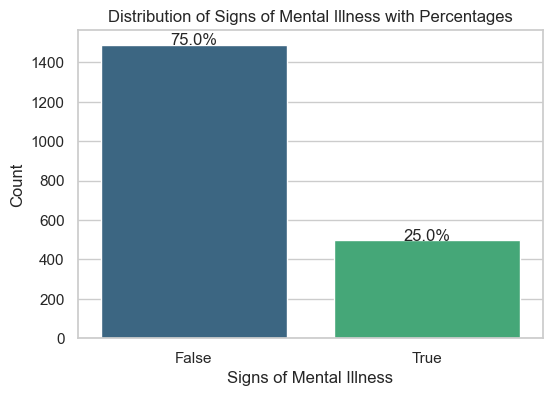

In [125]:
# Calculate the count and percentage of each category
signs_count = new_data['signs_of_mental_illness'].value_counts()
signs_percentage = new_data['signs_of_mental_illness'].value_counts(normalize=True) * 100

# Plotting signs_of_mental_illness distribution with percentages
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='signs_of_mental_illness', data=new_data, palette='viridis')

# Displaying percentages on the plot
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{signs_percentage[i]:.1f}%", ha="center")

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness with Percentages')
plt.show()

## 3.6 Descriptive statistics - threat level

We can see that 65% of people were quite aggresive and tried to attack police officer. This would suggest why so many police officers used only lethal weapons when trying to calm down criminal.

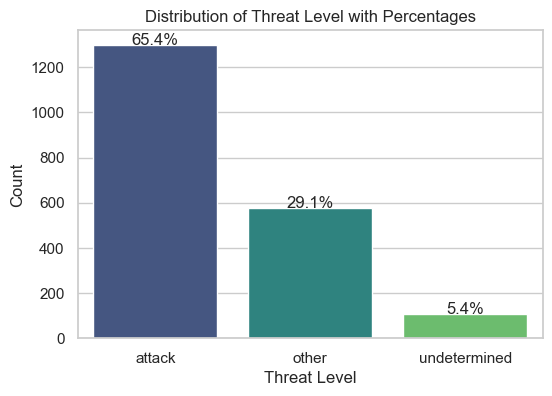

In [126]:
# Calculate the count and percentage of each category
threat_count = new_data['threat_level'].value_counts()
threat_percentage = new_data['threat_level'].value_counts(normalize=True) * 100

# Plotting threat_level distribution with percentages
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='threat_level', data=new_data, palette='viridis')

# Displaying percentages on the plot
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{threat_percentage[i]:.1f}%", ha="center")

plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Distribution of Threat Level with Percentages')
plt.show()

## 3.7 Descriptive statistics - threat level

Majority of the suspects haven't tried to flee. This would suggest that they have tried to attack the officer.

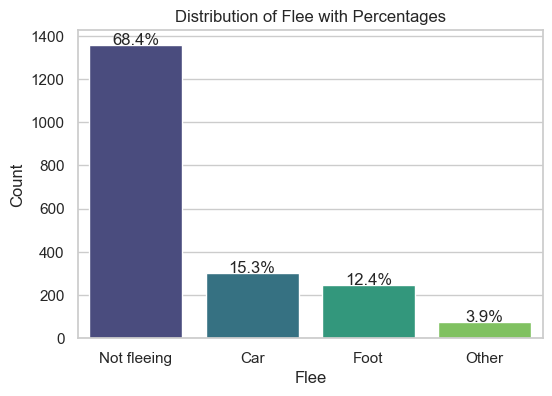

In [127]:
# Calculate the count and percentage of each category
flee_count = new_data['flee'].value_counts()
flee_percentage = new_data['flee'].value_counts(normalize=True) * 100

# Plotting flee distribution with percentages
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='flee', data=new_data, palette='viridis')

# Displaying percentages on the plot
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{flee_percentage[i]:.1f}%", ha="center")

plt.xlabel('Flee')
plt.ylabel('Count')
plt.title('Distribution of Flee with Percentages')
plt.show()

## 3.8 Descriptive statistics - body camera

We can notice that majority of the officers did not have the body camera on them. Which would suggest that it would be hard to evaluate police officer's and suspect's actions as the explanation from the officer might be biased, because criminal is dead.

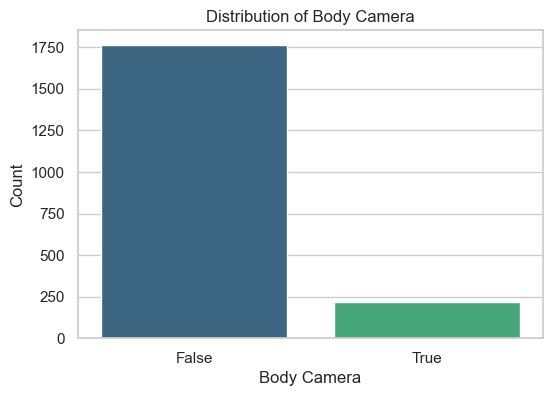

In [133]:
# Plotting distribution of body_camera
plt.figure(figsize=(6, 4))
sns.countplot(x='body_camera', data=new_data, palette='viridis')
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.title('Distribution of Body Camera')
plt.show()

## 3.8 Descriptive statistics - date

Our data consists of daily recors, however, the below distribution is showed group on month level for each year. We can see that there are no months that exibit unusual numbers.

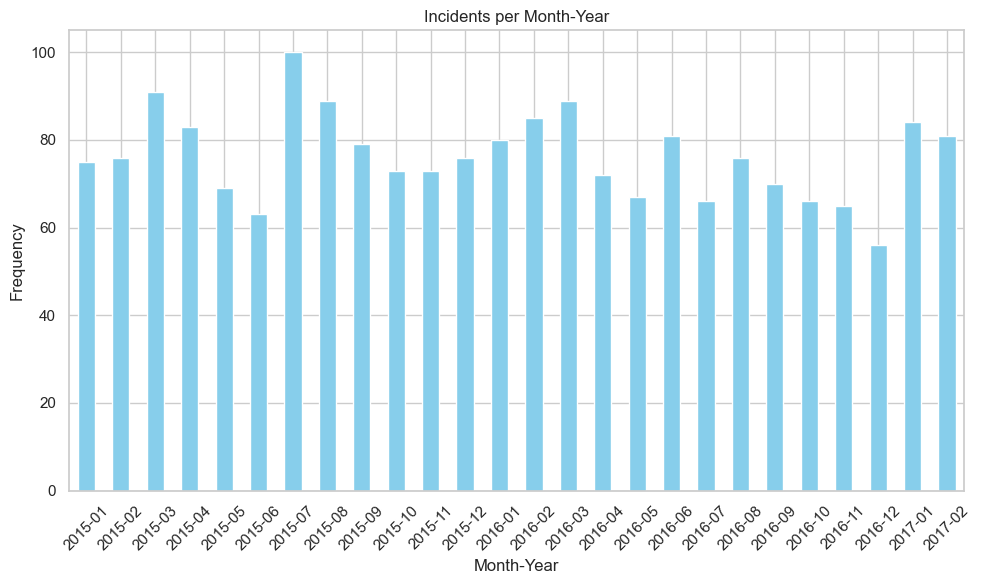

In [137]:
# Extracting month and year from the 'date' column
new_data['month'] = new_data['date'].dt.month
new_data['year'] = new_data['date'].dt.year

# Creating a combined date string column for better visualization
new_data['month_year'] = new_data['date'].dt.to_period('M')

# Plotting histogram on month and year level
plt.figure(figsize=(10, 6))
new_data['month_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Incidents per Month-Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Fatal shootings in the different States

In this section we are going to analyse deeper different aspects related to US States.

We will use data after removing duplicates and missing values.

In ordet to plot geographical graphs we need additional data about US States. To create geographical graphs we need longitude and altitude. For this we have inported additional dataset called 'uscities'

In [198]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [171]:
uscities = pd.read_csv('uscities.csv')
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


From this dataset we are going to join three columns - latitude, longitude and state_name.

In [199]:
# Renaming the 'city' column in 'data' to 'city_name' to avoid confusion
data.rename(columns={'city': 'city_name'}, inplace=True)

# Merging 'data_no_nulls' and 'uscities' on 'state' and 'city_name' in 'data_no_nulls' and 'city' and 'state_id' in 'uscities'
merged_data = pd.merge(data, uscities, how='left', left_on=['state', 'city_name'], right_on=['state_id', 'city'])

# Selecting only the desired columns (latitude, longitude and state_name)
lat_lng_state = merged_data[['lat', 'lng', 'state_name']]

# Adding the 'lat' and 'lng' columns to the 'data_no_nulls' DataFrame
data[['lat', 'lng','state_name']] = lat_lng_state

In [200]:
# Assuming you have a DataFrame named 'data' containing 'city_name' and 'state' columns

# Create the new 'city_state' column by concatenating 'city_name' and 'state'
data['city_state'] = data['city_name'] + ', ' + data['state']

# Display the updated DataFrame with the new 'city_state' column
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city_name,state,signs_of_mental_illness,threat_level,flee,body_camera,lat,lng,state_name,city_state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,47.2186,-123.1121,Washington,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,45.4920,-122.8725,Oregon,"Aloha, OR"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,37.6895,-97.3443,Kansas,"Wichita, KS"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,37.7558,-122.4449,California,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,40.3660,-104.7390,Colorado,"Evans, CO"


Also, in order to create interactive geographical graph we need to import US state shape information. This data is imported and visible in 'us_map'.

In [201]:
us_map = gpd.read_file('States_shapefile.shp')
us_map.head(10)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


We have noticed that some columns have upper case letters. That might create some issues later on so we need to have all columns for 'us_map' in lower cases.

In [202]:
# Convert column names to lowercase
us_map.columns = map(str.lower, us_map.columns)

# Now, all column names in us_map are lowercase
print(us_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


After adding additional data and performing some changes to the data sets now we can start plotting how deaths are spread among the different states.



In [203]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming you have the DataFrame 'data' with 'state_name' and 'age' columns

# Get the count of occurrences and average age for each state
state_stats = data.groupby('state_name')['age'].agg(['count', 'mean']).reset_index()
state_stats.columns = ['state_name', 'Occurrences', 'Average_Age']

# Merge state counts with US map data
merged_data = pd.merge(us_map, state_stats, on='state_name', how='left')

# Create a folium map centered around the US
m = folium.Map(location=[37, -102], zoom_start=4)

# Create a colormap
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

# Add states to the map with colors based on occurrences
for idx, row in merged_data.iterrows():
    state_occurrences = row['Occurrences']
    average_age = row['Average_Age']
    color = colormap(state_occurrences)
    tooltip_text = f"{row['state_name']}<br>Killings: {state_occurrences}<br>Age: {average_age:.1f}"
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, fill_color=color: {
            'fillColor': fill_color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip_text
    ).add_to(m)

# Display the map
m

ValueError: Thresholds are not sorted.

In [7]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Display the count of each race
print(race_counts)

race
W    1022
B     523
H     355
A      32
O      28
N      26
Name: count, dtype: int64


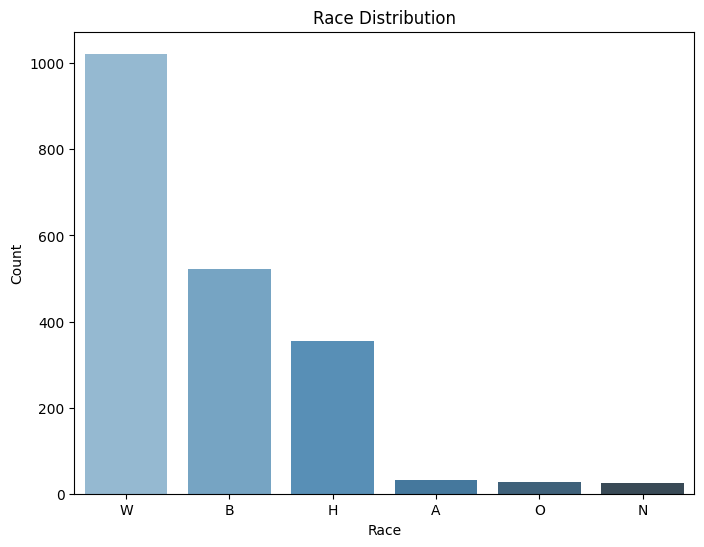

In [8]:
plt.figure(figsize=(8, 6))
race_counts = data['race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

sns.barplot(x='Race', y='Count', data=race_counts, palette='Blues_d')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [9]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

# Calculate percentages for W and B
percentage_W = (race_counts['W'] / total_population_W) * 100
percentage_B = (race_counts['B'] / total_population_B) * 100
percentage_H = (race_counts['H'] / total_population_H) * 100
percentage_A = (race_counts['A'] / total_population_A) * 100
percentage_N = (race_counts['N'] / total_population_N) * 100

# Create a DataFrame for percentages
race_percentages = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Total Population': [total_population_W, total_population_B, total_population_H, total_population_A, total_population_N],
    'Percentage': [percentage_W, percentage_B, percentage_H, percentage_A, percentage_N]
})

# Display the DataFrame
print(race_percentages)

  Race  Total Population  Percentage
0    W         200000000    0.000511
1    B          40000000    0.001307
2    H          57500000    0.000617
3    A          18000000    0.000178
4    N           2400000    0.001083


In [10]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

total_population = 323000000

# Calculate percentages for W and B
NumberOfKillings_W = (race_counts['W'] / total_population_W) * 1000000
NumberOfKillings_B = (race_counts['B'] / total_population_B) * 1000000
NumberOfKillings_H = (race_counts['H'] / total_population_H) * 1000000
NumberOfKillings_A = (race_counts['A'] / total_population_A) * 1000000
NumberOfKillings_N = (race_counts['N'] / total_population_N) * 1000000

# Round the calculated values and convert to integers
NumberOfKillings_W = int(round(NumberOfKillings_W))
NumberOfKillings_B = int(round(NumberOfKillings_B))
NumberOfKillings_H = int(round(NumberOfKillings_H))
NumberOfKillings_A = int(round(NumberOfKillings_A))
NumberOfKillings_N = int(round(NumberOfKillings_N))

# Calculate percentages for W and B
NumberOfKillings_TotalPopulation_W = (race_counts['W'] / total_population_W) * total_population
NumberOfKillings_TotalPopulation_B = (race_counts['B'] / total_population_B) * total_population
NumberOfKillings_TotalPopulation_H = (race_counts['H'] / total_population_H) * total_population
NumberOfKillings_TotalPopulation_A = (race_counts['A'] / total_population_A) * total_population
NumberOfKillings_TotalPopulation_N = (race_counts['N'] / total_population_N) * total_population

# Round the calculated values and convert to integers
NumberOfKillings_TotalPopulation_W = int(round(NumberOfKillings_TotalPopulation_W))
NumberOfKillings_TotalPopulation_B = int(round(NumberOfKillings_TotalPopulation_B))
NumberOfKillings_TotalPopulation_H = int(round(NumberOfKillings_TotalPopulation_H))
NumberOfKillings_TotalPopulation_A = int(round(NumberOfKillings_TotalPopulation_A))
NumberOfKillings_TotalPopulation_N = int(round(NumberOfKillings_TotalPopulation_N))

# Create a DataFrame for percentages
race_killings = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Killings per Million': [NumberOfKillings_W, NumberOfKillings_B, NumberOfKillings_H, NumberOfKillings_A, NumberOfKillings_N],
    'Killings per Total US population': [NumberOfKillings_TotalPopulation_W, NumberOfKillings_TotalPopulation_B, NumberOfKillings_TotalPopulation_H
                                         , NumberOfKillings_TotalPopulation_A, NumberOfKillings_TotalPopulation_N]
})

# Display the DataFrame
print(race_killings)

  Race  Killings per Million  Killings per Total US population
0    W                     5                              1651
1    B                    13                              4223
2    H                     6                              1994
3    A                     2                               574
4    N                    11                              3499


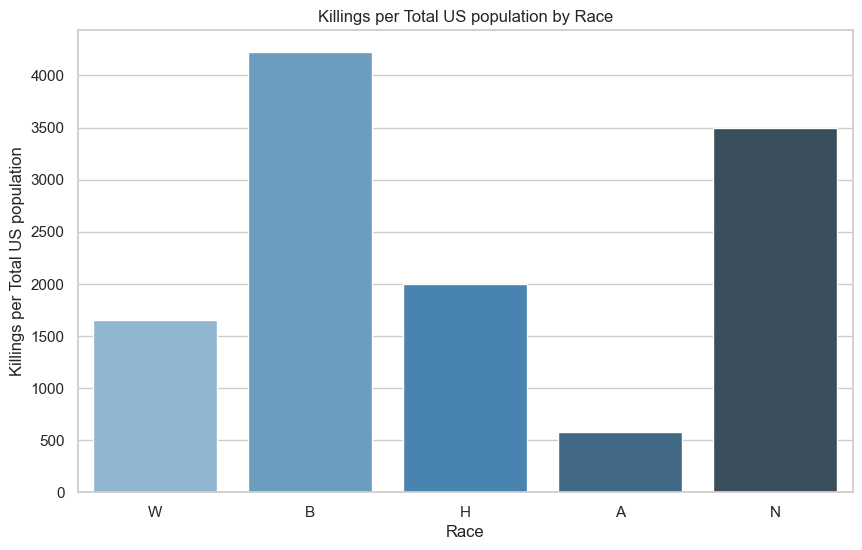

In [11]:
# Plotting the bar plot using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=race_killings,  x='Race', y='Killings per Total US population', palette='Blues_d')
plt.xlabel('Race')
plt.ylabel('Killings per Total US population')
plt.title('Killings per Total US population by Race')
plt.show()

In [204]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [205]:
uscities = pd.read_csv('uscities.csv')
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [206]:
# Renaming the 'city' column in 'data' to 'city_name' to avoid confusion
data.rename(columns={'city': 'city_name'}, inplace=True)

# Merging 'data' and 'uscities' on 'state' and 'city_name' in 'data' and 'city' and 'state_id' in 'uscities'
merged_data = pd.merge(data, uscities, how='left', left_on=['state', 'city_name'], right_on=['state_id', 'city'])

# Selecting only the desired columns (latitude and longitude)
lat_lng = merged_data[['lat', 'lng']]

# Adding the 'lat' and 'lng' columns to the 'data' DataFrame
data[['lat', 'lng']] = lat_lng

In [207]:
# Assuming you have a DataFrame named 'data' containing 'city_name' and 'state' columns

# Create the new 'city_state' column by concatenating 'city_name' and 'state'
data['city_state'] = data['city_name'] + ', ' + data['state']

# Display the updated DataFrame with the new 'city_state' column
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city_name,state,signs_of_mental_illness,threat_level,flee,body_camera,lat,lng,city_state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,47.2186,-123.1121,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,45.4920,-122.8725,"Aloha, OR"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,37.6895,-97.3443,"Wichita, KS"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,37.7558,-122.4449,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,40.3660,-104.7390,"Evans, CO"


In [208]:
us_map = gpd.read_file('States_shapefile.shp')
# Merging 'data' and 'uscities' on 'state' and 'city_name' in 'data' and 'city' and 'state_id' in 'uscities'
merged_data = pd.merge(data, us_map, how='left', left_on=['state'], right_on=['State_Code'])

# Selecting only the desired columns (latitude and longitude)
lat_lng = merged_data[['State_Name']]

# Adding the 'lat' and 'lng' columns to the 'data' DataFrame
data[['state_name']] = lat_lng

In [209]:
# Load the US map shapefile or GeoJSON file containing state boundaries
us_states_map = gpd.read_file('States_shapefile.shp')  # Replace with your actual file path

# Convert column names to lowercase
us_states_map.columns = map(str.lower, us_states_map.columns)

# Now, all column names in us_states_map are lowercase
print(us_states_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


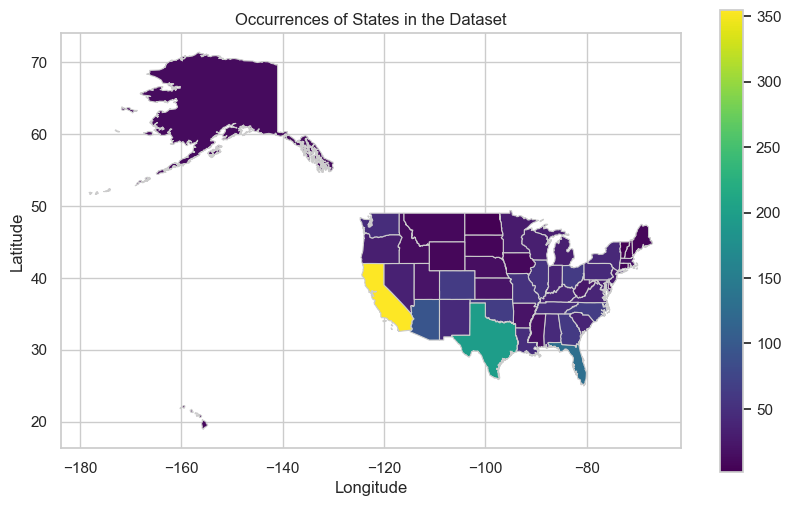

In [210]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'data' with 'state_name' column

# Get the count of occurrences for each state
state_counts = data['state_name'].value_counts().reset_index()
state_counts.columns = ['state_name', 'Occurrences']

# Merge state counts with US map data
merged_data = pd.merge(us_states_map, state_counts, on='state_name', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the choropleth map
merged_data.plot(column='Occurrences', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set titles and labels
plt.title('Occurrences of States in the Dataset')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [211]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming you have the DataFrame 'data' with 'state_name' and 'age' columns

# Get the count of occurrences and average age for each state
state_stats = data.groupby('state_name')['age'].agg(['count', 'mean']).reset_index()
state_stats.columns = ['state_name', 'Occurrences', 'Average_Age']

# Merge state counts with US map data
merged_data = pd.merge(us_states_map, state_stats, on='state_name', how='left')

# Create a folium map centered around the US
m = folium.Map(location=[37, -102], zoom_start=4)

# Create a colormap
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

# Add states to the map with colors based on occurrences
for idx, row in merged_data.iterrows():
    state_occurrences = row['Occurrences']
    average_age = row['Average_Age']
    color = colormap(state_occurrences)
    tooltip_text = f"{row['state_name']}<br>Killings: {state_occurrences}<br>Age: {average_age:.1f}"
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, fill_color=color: {
            'fillColor': fill_color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip_text
    ).add_to(m)

# Display the map
m

## Appendix

Information about 'race' population in US was taken from - https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/.
Information about longitude and altitude information was taken from - https://simplemaps.com/data/us-cities.
Shape of the US map was taken from - https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e/explore?location=31.392059%2C-106.491703%2C4.00.